<h1><Center>Drug labeling JSON Exploratory Data Analysis(EDA)</Center></h1>

# Lesson Goals

<div style="text-align: Justify"> In this lesson, we will do Web scraping of FDA website and we will learn how to explore Json datase in R.  </div>

______
# Prerequests 
  1. Install the below mentioned libraries
  
  NB:make sure Jupyter Notebook 

In [1]:
library(jsonlite)     # flexible, robust, high performance tools for working with JSON in R
library(dplyr)        # A fast, consistent tool for working with data frame like objects
library(stringi)      # Character String Processing Facilities
library(ggplot2)      # An Implementation of the Grammar of Graphics
library(downloader)   # Download Files over HTTP and HTTPS
library(lubridate)    # To work with date-times


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'downloader' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



***Downloading JSON data***

Let's download the prescription and over-the-counter (OTC) drug labeling data from the openFDA website. The openFDA drug product labeling API provides data for prescription and over-the-counter (OTC) drug labeling.

There are five data files and we will use a for loop to download all of them. Then, we will concatenate them.

In [ ]:
for(i in 1:9){
    url=paste0("https://download.open.fda.gov/drug/label/drug-label-000",i,"-of-0009.json.zip")
    download(url,dest="json.zip")
    unzip ("json.zip")
}

Let's see if we have downloaded all the data files.

In [2]:
dir()

[1] "-Customer-Segmentation-Analysis-using-unsupervised-learning-in-Retail-Sectors-"              
  [2] "__pycache__"                                                                                 
  [3] "3D Objects"                                                                                  
  [4] "anaco"                                                                                       
  [5] "anaconda3"                                                                                   
  [6] "Anomaly Detection.ipynb"                                                                     
  [7] "ap.py"                                                                                       
  [8] "App Rate Prediction.ipynb"                                                                   
  [9] "App.py"                                                                                      
 [10] "AppData"                                                                                     
 [11] "Apple"                                                                                       
 [12] "Application Data"                                                                            
 [13] "Ashenafi"                                                                                    
 [14] "ashenafig"                                                                                   
 [15] "ashj"                                                                                        
 [16] "auto_delete.log"                                                                             
 [17] "auto_delete.py"                                                                              
 [18] "AWS.ipynb"                                                                                   
 [19] "AWS_RDS_R_Python.html"                                                                       
 [20] "AWS_RDS_R_Python.ipynb"                                                                      
 [21] "awsAshuuuu-Copy1.ipynb"                                                                      
 [22] "awsAshuuuu.ipynb"                                                                            
 [23] "beautifulsoup.ipynb"                                                                         
 [24] "bible.txt"                                                                                   
 [25] "bible_frequency analysis.ipynb"                                                              
 [26] "bot"                                                                                         
 [27] "car.py"                                                                                      
 [28] "Chicago_crime.ipynb"                                                                         
 [29] "cmake"                                                                                       
 [30] "cocoapi"                                                                                     
 [31] "columbia.py"                                                                                 
 [32] "Contacts"                                                                                    
 [33] "contractions.py"                                                                             
 [34] "Cookies"                                                                                     
 [35] "corenlp_server-b70818ebd1674ff0.props"                                                       
 [36] "Covera_exercise.ipynb"                                                                       
 [37] "Crimes_-_2001_to_Present.csv"                                                                
 [38] "curl-7.69.1-win64-mingw"                                                                     
 [39] "Customer Segmentation.ipynb"                                                                 
 [40] "data1.RData"                                            

**Let's create a character vector of the names of the json files above using list.files().**

In [3]:
filenames <- list.files(pattern="*.json", full.names=TRUE)
filenames

[1] "./drug-label-0001-of-0009.json" "./drug-label-0002-of-0009.json"
[3] "./drug-label-0003-of-0009.json" "./drug-label-0004-of-0009.json"
[5] "./drug-label-0005-of-0009.json" "./drug-label-0006-of-0009.json"
[7] "./drug-label-0007-of-0009.json" "./drug-label-0008-of-0009.json"
[9] "./drug-label-0009-of-0009.json"

***Understanding the data***

To read JSON data, we are using the fromJSON function from the jsonlite package.

Let's read in one of the data files and understand the content.

In [4]:
drug1 = fromJSON(filenames[1])

In [5]:
names(drug1)

[1] "meta"    "results"

**See what meta contains**

In [6]:
drug1$meta

$last_updated
[1] "2020-08-26"

$terms
[1] "https://open.fda.gov/terms/"

$results
$results$skip
[1] 0

$results$total
[1] 171082

$results$limit
[1] 20000


$license
[1] "https://open.fda.gov/license/"

$disclaimer
[1] "Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service."

As we can see above, meta is metadata about the data, including a disclaimer, link to data license, last-updated date, and total matching records

**Next, let's see what results contains**

In [7]:
results=drug1$results
class(results)

[1] "data.frame"

In [8]:
glimpse(results)

Observations: 20,000
Variables: 141
$ active_ingredient                                                <list> [...
$ storage_and_handling                                             <list> [...
$ warnings                                                         <list> [...
$ inactive_ingredient                                              <list> [...
$ do_not_use                                                       <list> [...
$ openfda                                                          <data.frame> ...
$ keep_out_of_reach_of_children                                    <list> [...
$ spl_product_data_elements                                        <list> [...
$ package_label_principal_display_panel                            <list> [...
$ set_id                                                           <chr> "a...
$ dosage_and_administration                                        <list> [...
$ version                                                          <chr> "1...
$ stop_use 

***Merging all the data files***

Now, let's select certain variables from each data file and merge them and see the number of submissions across time.

As a starting point, I will select the variables "effective_time" and "boxed_warning" to help me see the trend of submissions with time and how many of them contain boxed warning.

In [9]:
spl = fromJSON(filenames[1])$results                  # read drug-label-0001-of-0005.json
spl=select(spl,effective_time,boxed_warning)          # select effective_time and boxed_warning

  for(i in 3:length(filenames)){                      # read all the rest
      
      tmp =fromJSON(filenames[i])$results
      
   spl=rbind(spl, select(tmp,effective_time,boxed_warning))  # concatenate all
}

In [10]:
glimpse(spl)

Observations: 151,082
Variables: 2
$ effective_time <chr> "20200507", "20200508", "20200510", "20181108", "201...
$ boxed_warning  <list> [NULL, NULL, NULL, NULL, NULL, NULL, NULL, NULL, NU...


We see that the variable effective_time is character but boxed_warning is list. So, we will use unlist() to change the list to character.

But first, let's understand effective_time.

In [11]:
cat("Maximum number of characters in effective_time:")
max(nchar(spl$effective_time))

Maximum number of characters in effective_time:

[1] 10

In [12]:
cat("Minimum number of characters in effective_time:")
min(nchar(spl$effective_time))

Minimum number of characters in effective_time:

[1] 8

In [13]:
spl%>%group_by(nchar(effective_time))%>%summarize(count=n())


nchar(effective_time),count
8,151077
9,3
10,2


As shown above the variable effective_time has different number of characters. This suggests that the format is not consistent. Let's first see those that have 10 characters.



In [15]:
tmp=select(spl,effective_time)
filter(tmp, nchar(effective_time)==10)

effective_time
2009103009
2010110126


What about those that contain nine characters?



In [16]:
filter(tmp, nchar(effective_time)==9)


effective_time
201001004
201004119
201001018


Finally, let's have a look at entries with eight characters.



In [17]:
head(filter(tmp, nchar(effective_time)==8))


effective_time
20200507
20200508
20200510
20181108
20191110
20150925


One option is to use yyyy/mm/dd format and drop the additional information. This will help us to have a consistent date format and we can do analysis on daily, monthly or annual basis. The function stri_sub from the stringi package helps us to extact fixed number of characters. So, let's extact the first eight characters only from the variable effective_time.

In [18]:
spl=mutate(spl,effective_time=stri_sub(effective_time,1,8))


Now, let's check that all have eight characters only.



In [19]:
spl%>%group_by(nchar(effective_time))%>%summarize(count=n())


nchar(effective_time),count
8,151082


Now, since all have eight characters in yyyymmdd format, we can use the ymd function from the lubridate package to change the values from character to date.



In [20]:
spl=mutate(spl,effective_time =ymd(effective_time))


Warning message:
" 1 failed to parse."

In [21]:
glimpse(spl)  # checking if effective_time has been changed to date format.


Observations: 151,082
Variables: 2
$ effective_time <date> 2020-05-07, 2020-05-08, 2020-05-10, 2018-11-08, 201...
$ boxed_warning  <list> [NULL, NULL, NULL, NULL, NULL, NULL, NULL, NULL, NU...


***Number of submissions per day***

Warning message:
"Removed 1 rows containing missing values (geom_path)."

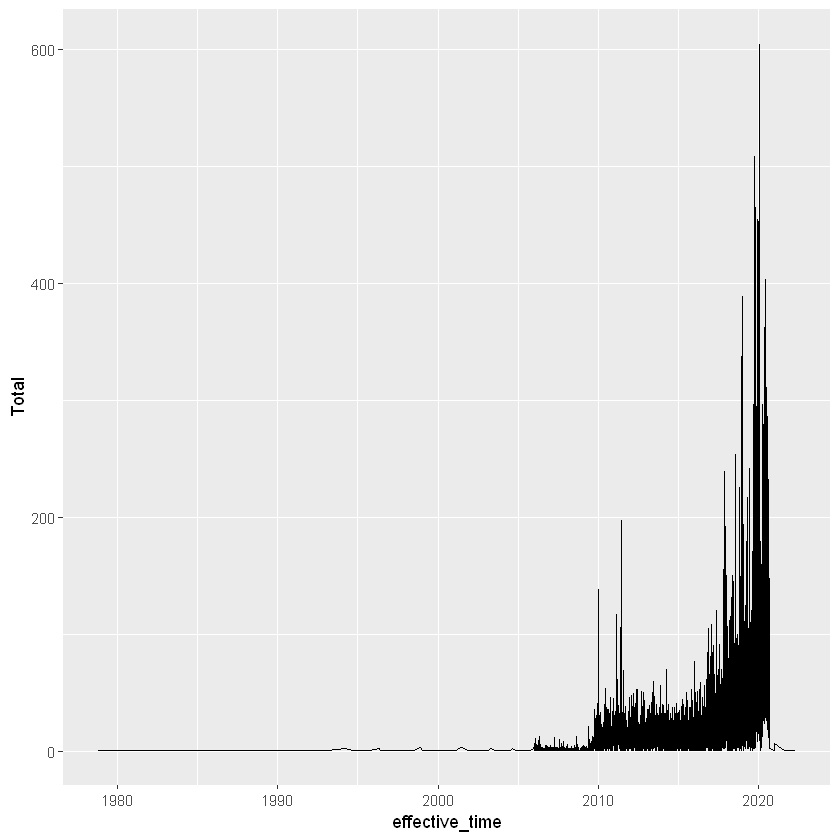

In [22]:
spl%>%group_by(effective_time)%>%summarize(Total=n())%>%
ggplot(aes(x=effective_time,y=Total))+geom_line()

There are very small number of reports prior to 2009, so let's exclude them from our figure.



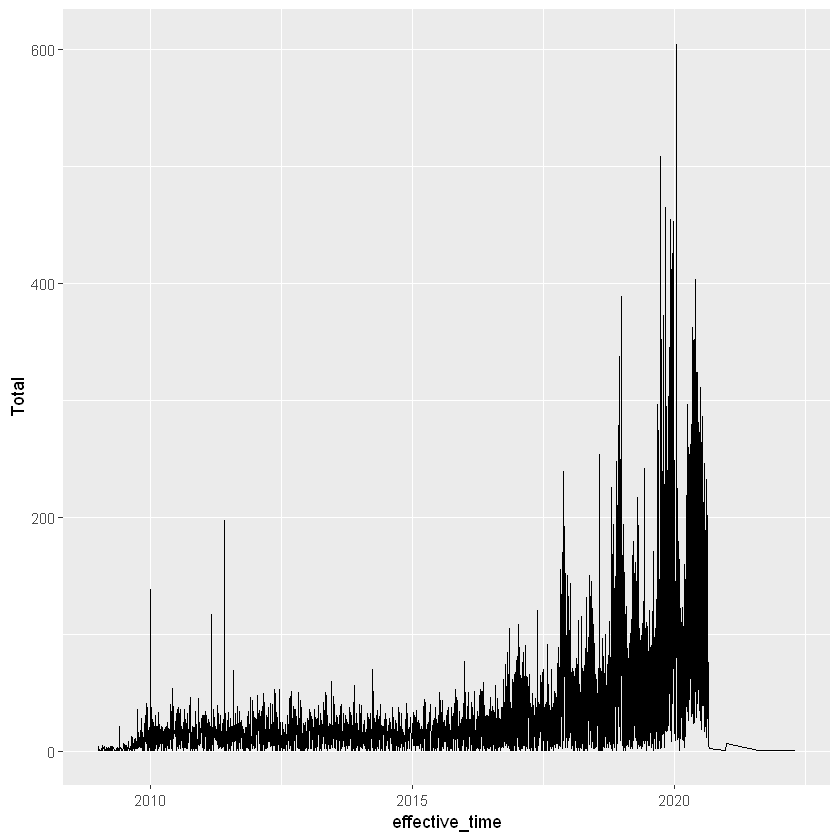

In [23]:
spl%>%filter(effective_time>ymd("20081231"))%>%
              group_by(effective_time)%>%summarize(Total=n())%>%
ggplot(aes(x=effective_time,y=Total))+geom_line()


This figure is not that helpful, so let's see number of reports per year rather than per day.



In [27]:
spl=mutate(spl, year = format(effective_time, "%Y"))


In [28]:
glimpse(spl)


Observations: 151,082
Variables: 3
$ effective_time <date> 2020-05-07, 2020-05-08, 2020-05-10, 2018-11-08, 201...
$ boxed_warning  <list> [NULL, NULL, NULL, NULL, NULL, NULL, NULL, NULL, NU...
$ year           <chr> "2020", "2020", "2020", "2018", "2019", "2015", "201...


Since there is only one entry for 2017, we will consider up to the end of 2016.

**revised**

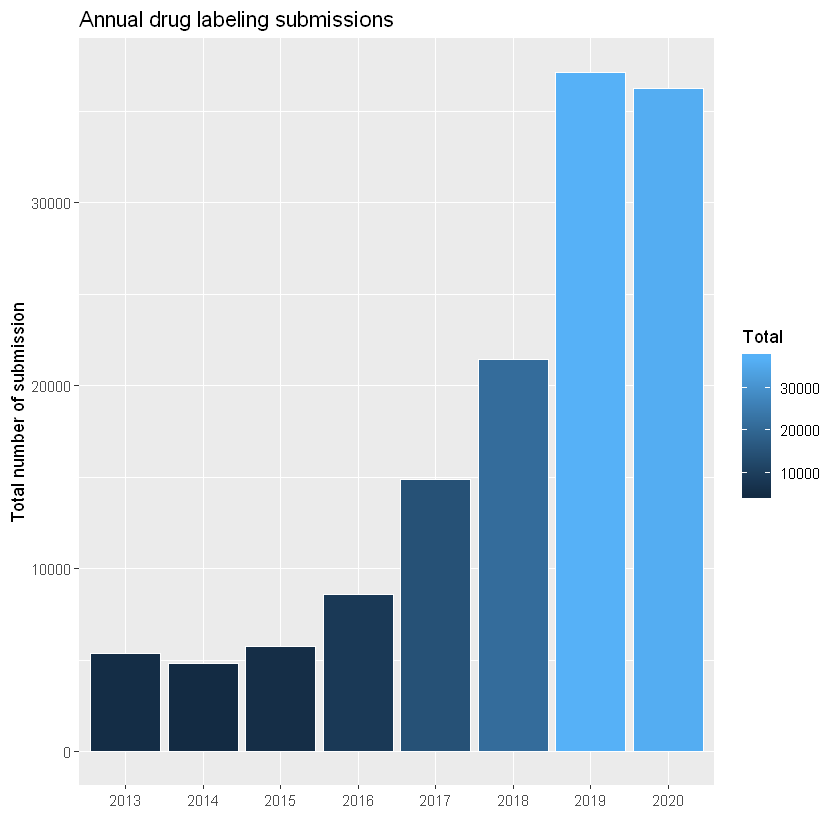

In [33]:
spl%>%filter(effective_time>ymd("20121231") & effective_time < ymd("20210101"))%>%group_by(year)%>%summarize(Total=n())%>%
ggplot(aes(x=year,y=Total, fill=Total))+geom_bar(stat="identity",color='white')+
ggtitle('Annual drug labeling submissions')+xlab('')+ylab('Total number of submission')

Now, let's see boxed warning, which is the strongest warning that the FDA requires, and signifies that medical studies indicate that the drug carries a significant risk of serious or even life-threatening adverse effects.

In [34]:
select(spl,boxed_warning)[25:30,]


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

In [35]:
spl$boxed_warning[spl$boxed_warning=="NULL"] =NA


In [36]:
glimpse(spl)  # check that NULL is changed to NA


Observations: 151,082
Variables: 3
$ effective_time <date> 2020-05-07, 2020-05-08, 2020-05-10, 2018-11-08, 201...
$ boxed_warning  <list> [NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ year           <chr> "2020", "2020", "2020", "2018", "2019", "2015", "201...


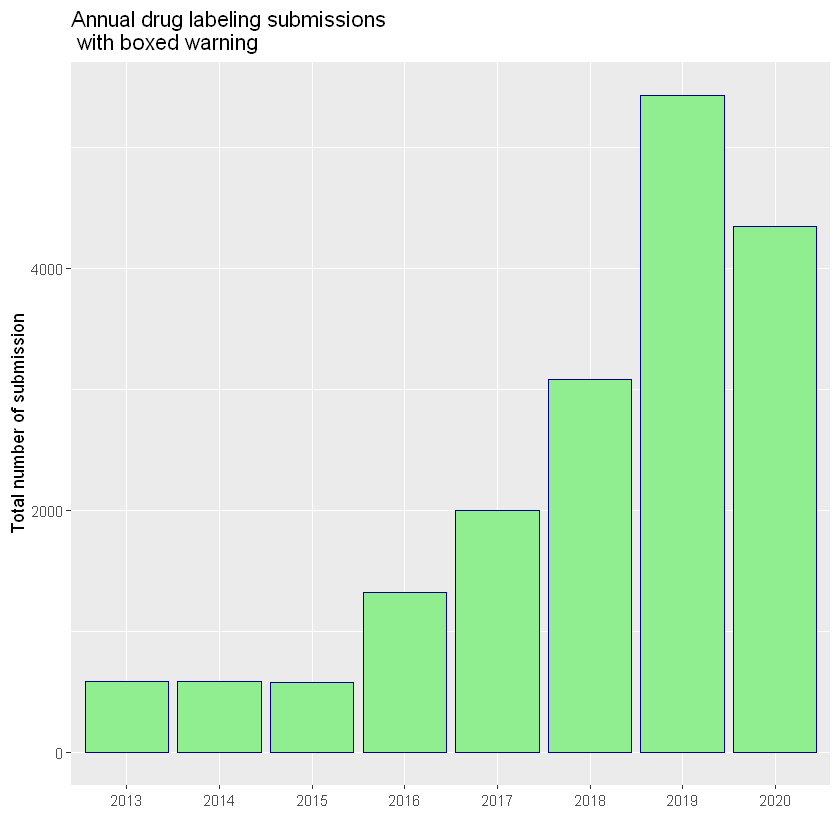

In [38]:
spl%>%filter(effective_time>ymd("20121231") & effective_time < ymd("20210101"))%>%
group_by(year)%>%summarize(total_boxed_warning=sum(!is.na(boxed_warning)))%>%
ggplot(aes(x=year,y=total_boxed_warning))+geom_bar(stat="identity",fill='light green',color='dark blue')+
ggtitle('Annual drug labeling submissions \n with boxed warning ')+xlab('')+
ylab('Total number of submission')

In [39]:
head(unique(spl$boxed_warning),3)


[[1]]
[1] NA

[[2]]
[1] "WARNING: ADDICTION, ABUSE, AND MISUSE: RISK EVALUATION AND MITIGATION STRATEGY (REMS); LIFE-THREATENING RESPIRATORY DEPRESSION; ACCIDENTAL INGESTION; NEONATAL OPIOID; WITHDRAWAL SYNDROME; CYTOCHROME P450 3A4 INTERACTION; HEPATOTOXICITY AND RISKS FROM CONCOMITANT USE WITH BENZODIAZEPINES OR OTHER CNS DEPRESSANTS Addiction, Abuse, and Misuse Hydrocodone bitartrate and acetaminophen tablets exposes patients and other users to the risks of opioid addiction, abuse, and misuse, which can lead to overdose and death. Assess each patient’s risk prior to prescribing hydrocodone bitartrate and acetaminophen tablets, and monitor all patients regularly for the development of these behaviors or conditions [see WARNINGS]. Opioid Analgesic Risk Evaluation and Mitigation Strategy (REMS): To ensure that the benefits of opioid analgesics outweigh the risks of addiction, abuse, and misuse, the Food and Drug Administration (FDA) has required a REMS for these products [see WARNINGS]. Under the requirements of the REMS, drug companies with approved opioid analgesic products must make REMS-compliant education programs available to healthcare providers. Healthcare providers are strongly encouraged to complete a REMS-compliant education program, counsel patients and/or their caregivers, with every prescription, on safe use, serious risks, storage, and disposal of these products, emphasize to patients and their caregivers the importance of reading the Medication Guide every time it is provided by their pharmacist, and Consider other tools to improve patient, household, and community safety. Life-Threatening Respiratory Depression Serious, life-threatening, or fatal respiratory depression may occur with use of hydrocodone bitartrate and acetaminophen tablets. Monitor for respiratory depression, especially during initiation of hydrocodone bitartrate and acetaminophen tablets or following a dose increase [seeWARNINGS]. Accidental Ingestion Accidental ingestion of hydrocodone bitartrate and acetaminophen tablets, especially by children, can result in a fatal overdose of Hydrocodone bitartrate and acetaminophen tablets [seeWARNINGS]. Neonatal Opioid Withdrawal Syndrome Prolonged use of hydrocodone bitartrate and acetaminophen tablets during pregnancy can result in neonatal opioid withdrawal syndrome, which may be life-threatening if not recognized and treated, and requires management according to protocols developed by neonatology experts. If opioid use is required for a prolonged period in a pregnant woman, advise the patient of the risk of neonatal opioid withdrawal syndrome and ensure that appropriate treatment will be available [seeWARNINGS]. Cytochrome P450 3A4 Interaction The concomitant use of Hydrocodone Bitartrate and Acetaminophen Tablets with all Cytochrome P450 3A4 inhibitors may result in an increase in hydrocodone plasma concentrations, which could increase or prolong adverse reactions and may cause potentially fatal respiratory depression. In addition, discontinuation of a concomitantly used Cytochrome P450 3A4 inducer may result in an increase in hydrocodone plasma concentrations. Monitor patients receiving Hydrocodone Bitartrate and Acetaminophen Tablets and any Cytochrome P450 3A4 inhibitor or inducer for signs of respiratory depression or sedation [see CLINICAL PHARMACOLOGY, WARNINGS, PRECAUTIONS;DRUG INTERACTIONS]. Hepatotoxicity Acetaminophen has been associated with cases of acute liver failure, at times resulting in liver transplant and death. Most of the cases of liver injury are associated with the use of acetaminophen at doses that exceed 4,000 milligrams per day, and often involve more than one acetaminophen-containing product (see WARNINGS). Risks from concomitant use with Benzodiazepines or other CNS Depressants Concomitant use of opiods with benzodiazepines or other central nervous system (CNS) depressants including alcohol, may result in profound sedation, respiratory depression, coma, and death. [seeWA

**We can use unlist to change list to character. We are using the function paste0 to concatenate the lists for each row, with the elements being separated by the value of collapse.**

In [40]:
for(i in 1:nrow(spl)){
      spl$boxed_warning[i]=paste0(unlist(spl$boxed_warning[i]),collapse=",")
    }
spl$boxed_warning=unlist(spl$boxed_warning)

In [41]:
glimpse(spl)  # check if boxed_warning has been changed to character


Observations: 151,082
Variables: 3
$ effective_time <date> 2020-05-07, 2020-05-08, 2020-05-10, 2018-11-08, 201...
$ boxed_warning  <chr> "NA", "NA", "NA", "NA", "NA", "NA", "NA", "NA", "NA"...
$ year           <chr> "2020", "2020", "2020", "2018", "2019", "2015", "201...


**Get additional variables**

As we have seen above, the variable openfda is a data frame and contains important variables. So, let's extract some variables and play with them.



In [42]:
spl_openfda= fromJSON(filenames[1])$results$openfda

spl_openfda=select(spl_openfda,manufacturer_name,product_type,route,generic_name,brand_name,substance_name)

  for(i in 2:length(filenames)){
      tmp = fromJSON(filenames[i])$results$openfda
      tmp = select(tmp,manufacturer_name,product_type,route,generic_name,brand_name,substance_name)
      spl_openfda=rbind(spl_openfda, tmp)
}

In [43]:
glimpse(spl_openfda)  # we have selected 6 variables and we will unlist the variables which are lists.


Observations: 171,082
Variables: 6
$ manufacturer_name <list> ["Tonic Bath & Products Shenzhen Ltd", "THE KROG...
$ product_type      <list> ["HUMAN OTC DRUG", "HUMAN OTC DRUG", "HUMAN OTC ...
$ route             <list> ["TOPICAL", "TOPICAL", "TOPICAL", NULL, "ORAL", ...
$ generic_name      <list> ["ETHYL ALCOHOL", "AVOBENZONE, HOMOSALATE, OCTIS...
$ brand_name        <list> ["Hand Sanitizer", "KROGER SPORT SPF 15 SUNSCREE...
$ substance_name    <list> ["ALCOHOL", <"OCTISALATE", "OXYBENZONE", "HOMOSA...


In [44]:
"NULL"%in%(spl_openfda$product_type)


[1] TRUE

**To unlist, NULL must be changed to NA.**



In [45]:
spl_openfda$product_type[spl_openfda$product_type=="NULL"] =NA


In [46]:
unique(spl_openfda$product_type)


[[1]]
[1] "HUMAN OTC DRUG"

[[2]]
[1] NA

[[3]]
[1] "HUMAN PRESCRIPTION DRUG"

In [47]:
spl_openfda = mutate(spl_openfda,product_type=unlist(product_type))


**Now, let's unlist route.**



In [48]:
"NULL"%in%(spl_openfda$route)


[1] TRUE

In [49]:
head(unique(spl_openfda$route),10)


[[1]]
[1] "TOPICAL"

[[2]]
NULL

[[3]]
[1] "ORAL"

[[4]]
[1] "BUCCAL"

[[5]]
[1] "EXTRACORPOREAL"

[[6]]
[1] "DENTAL"

[[7]]
[1] "OPHTHALMIC"

[[8]]
[1] "RESPIRATORY (INHALATION)"

[[9]]
[1] "AURICULAR (OTIC)"

[[10]]
[1] "CUTANEOUS"

In [2]:
spl_openfda$route[spl_openfda$route=="NULL"] =NA


ERROR: Error in spl_openfda$route[spl_openfda$route == "NULL"] = NA: object 'spl_openfda' not found


In [1]:
for(i in 1:nrow(spl_openfda)){
      spl_openfda$route[i]=paste0(unlist(spl_openfda$route[i]),collapse=",")
    }
spl_openfda = mutate(spl_openfda, route=unlist(route))

ERROR: Error in nrow(spl_openfda): object 'spl_openfda' not found



 
 
# Further reading


1.rjson [link](https://www.rdocumentation.org/packages/rjson/versions/0.2.20).

2.A Simple and Robust JSON Parser and Generator for R [link](https://cran.r-project.org/web/packages/jsonlite/jsonlite.pdf).
 
3.Web Scraping R Data From JSON (R jsonlite) [link](https://www.programmingr.com/examples/reading-json-data/)
 
 
 _________________________
# Summary
In this tutorial, you discovered how to analyse JSON data with R. The data scraped from Food and Drug Administration website. 

Specifically, you learned:

How to download json file(Web scrapping).
How to explore the data for better insight.
How to understand visually .
How to merge all data source in a single file.
__________________________
# Next Step
In the next blog post, we will perform the same tasks using Python.